In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('Datasets/customer_churn_dataset.csv')
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,InternetService,Contract,PaymentMethod,Churn
0,1,Male,68,16,27.74,3648.49,DSL,Month-to-month,Electronic check,No
1,2,Female,57,51,21.21,5116.65,Fiber optic,Two year,Electronic check,No
2,3,Male,24,11,48.82,1605.69,No,Month-to-month,Electronic check,No
3,4,Male,49,47,20.92,4666.11,DSL,Month-to-month,Mailed check,No
4,5,Male,65,21,43.01,4315.82,DSL,Month-to-month,Credit card,Yes


In [8]:
df.shape

(10000, 10)

In [9]:
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
Tenure             0
MonthlyCharges     0
TotalCharges       0
InternetService    0
Contract           0
PaymentMethod      0
Churn              0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.332600,35.414700,70.167075,4036.798933
std,2886.89568,17.908044,20.785609,28.742483,2279.409274
min,1.00000,18.000000,0.000000,20.000000,100.040000
25%,2500.75000,33.000000,17.000000,45.470000,2052.837500
50%,5000.50000,48.000000,35.000000,70.360000,4048.725000
75%,7500.25000,64.000000,53.000000,94.670000,6000.960000
max,10000.00000,79.000000,71.000000,119.990000,7998.340000


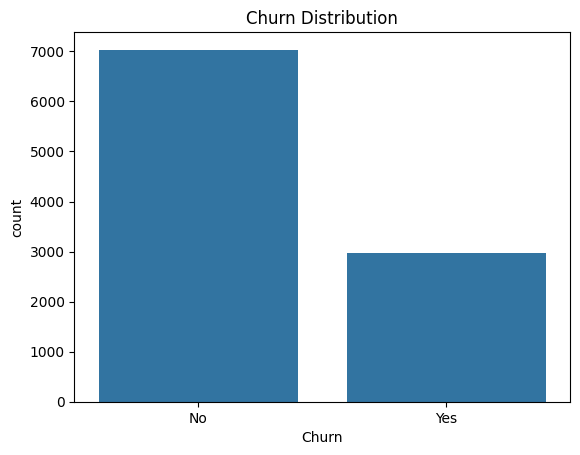

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Churn'])
plt.title('Churn Distribution')
plt.show()


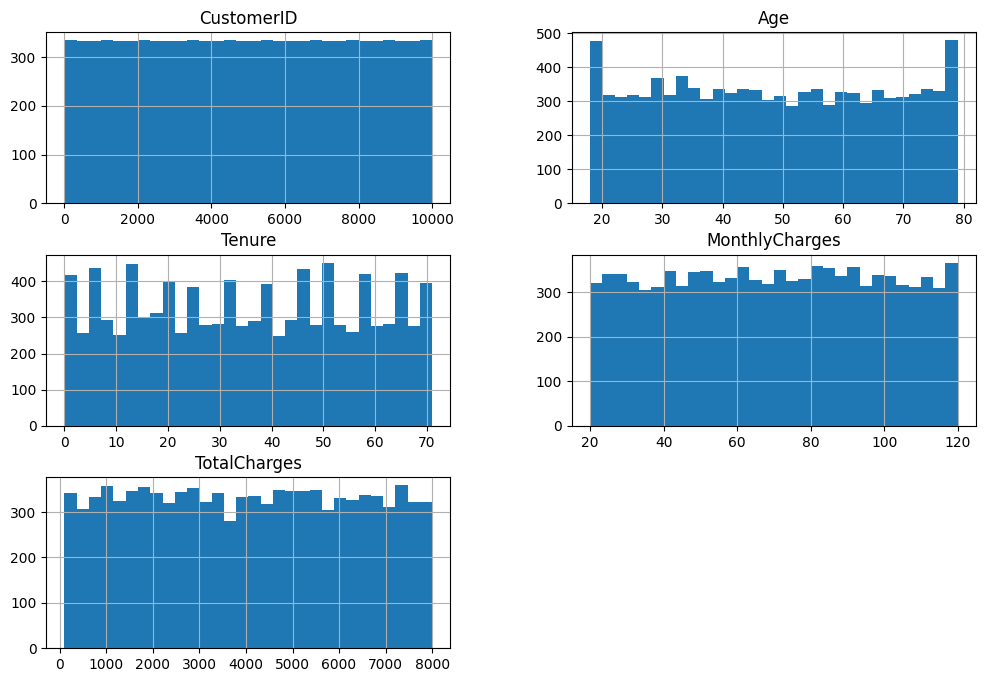

In [15]:
df.hist(figsize=(12, 8), bins=30)
plt.show()


In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Gender', 'InternetService', 'Contract', 'PaymentMethod', 'Churn'], dtype='object')
Numerical Columns: Index(['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Example: Encoding 'Gender' (Male/Female) → (0/1)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [19]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,InternetService,Contract,PaymentMethod,Churn
0,1,1,68,16,27.74,3648.49,DSL,Month-to-month,Electronic check,No
1,2,0,57,51,21.21,5116.65,Fiber optic,Two year,Electronic check,No
2,3,1,24,11,48.82,1605.69,No,Month-to-month,Electronic check,No
3,4,1,49,47,20.92,4666.11,DSL,Month-to-month,Mailed check,No
4,5,1,65,21,43.01,4315.82,DSL,Month-to-month,Credit card,Yes


In [20]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)

# Convert only newly created one-hot encoded columns to int
df[df.select_dtypes('float').columns] = df.select_dtypes('float').astype(int)

df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,InternetService,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,68,16,27,3648,DSL,No,False,False,False,True,False
1,2,0,57,51,21,5116,Fiber optic,No,False,True,False,True,False
2,3,1,24,11,48,1605,No,No,False,False,False,True,False
3,4,1,49,47,20,4666,DSL,No,False,False,False,False,True
4,5,1,65,21,43,4315,DSL,Yes,False,False,True,False,False


In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['InternetService', 'Churn'], dtype='object')


In [22]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn_Yes
0,1,1,68,16,27,3648,False,False,False,True,False,False,False,False
1,2,0,57,51,21,5116,False,True,False,True,False,True,False,False
2,3,1,24,11,48,1605,False,False,False,True,False,False,True,False
3,4,1,49,47,20,4666,False,False,False,False,True,False,False,False
4,5,1,65,21,43,4315,False,False,True,False,False,False,False,True


In [23]:
df = df.astype(int)
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn_Yes
0,1,1,68,16,27,3648,0,0,0,1,0,0,0,0
1,2,0,57,51,21,5116,0,1,0,1,0,1,0,0
2,3,1,24,11,48,1605,0,0,0,1,0,0,1,0
3,4,1,49,47,20,4666,0,0,0,0,1,0,0,0
4,5,1,65,21,43,4315,0,0,1,0,0,0,0,1


# Feature Selection 

## Correlation

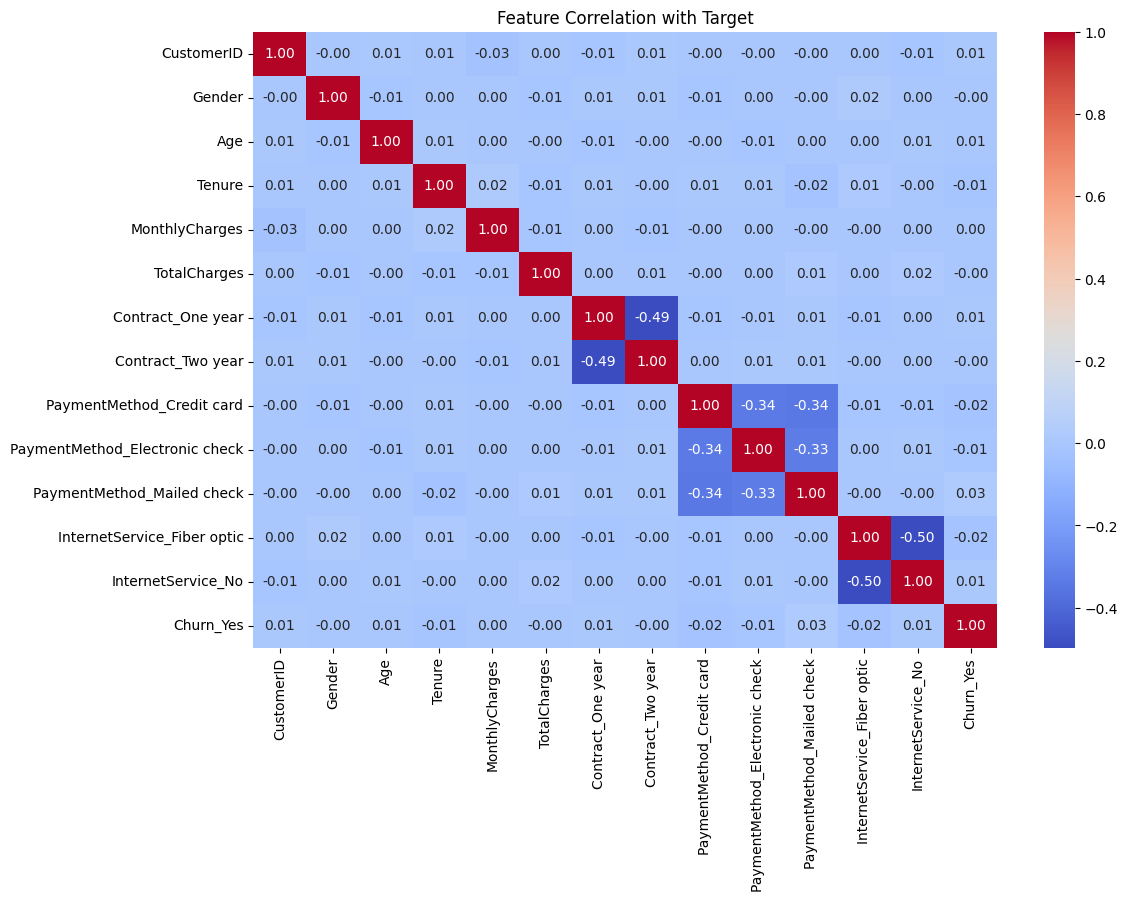

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Target")
plt.show()


## Using Chi-Square

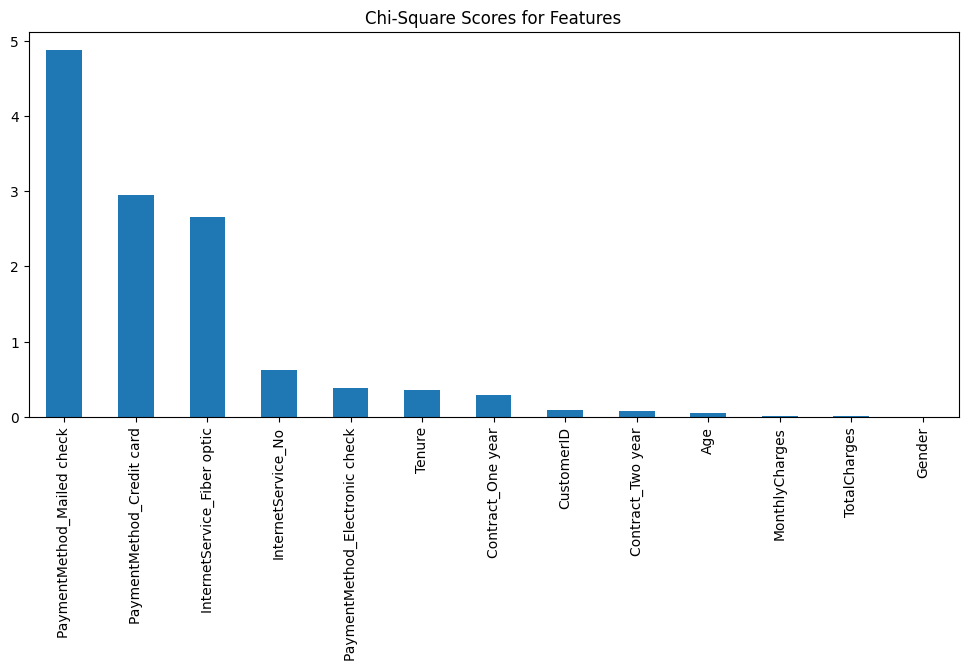

In [28]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

# Scale the features (Chi-Square needs non-negative values)
X_scaled = MinMaxScaler().fit_transform(X)

chi_scores = chi2(X_scaled, y)
feature_scores = pd.Series(chi_scores[0], index=X.columns)
feature_scores.sort_values(ascending=False).plot(kind="bar", figsize=(12,5))
plt.title("Chi-Square Scores for Features")
plt.show()


## Using RandomForest Classifier

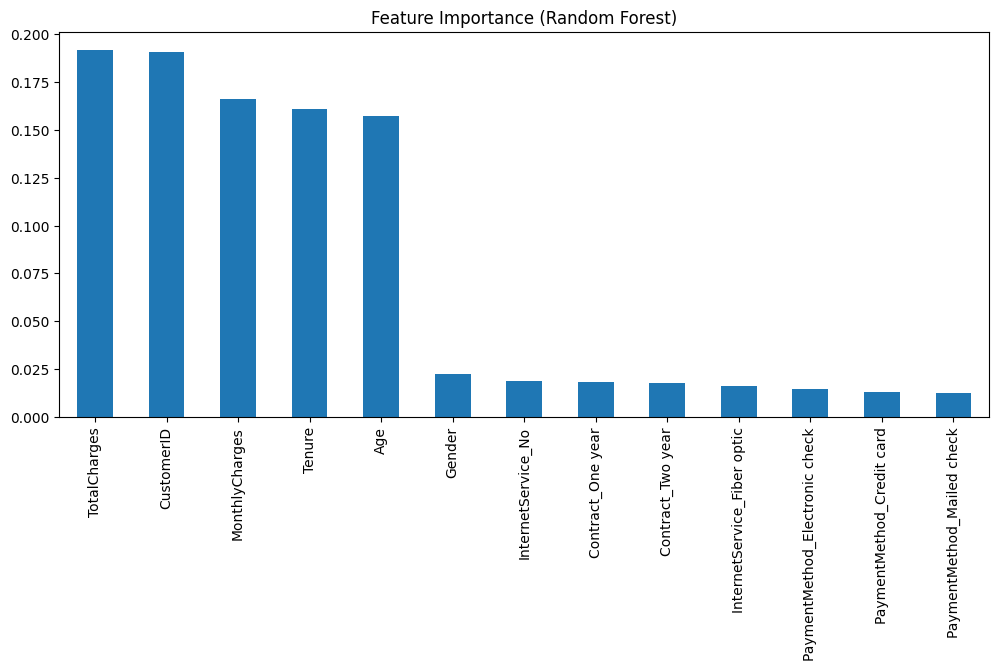

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(12,5))
plt.title("Feature Importance (Random Forest)")
plt.show()


In [31]:
correlation = df.corr()["Churn_Yes"].abs().sort_values(ascending=False)
print(correlation)

Churn_Yes                         1.000000
PaymentMethod_Mailed check        0.025552
PaymentMethod_Credit card         0.019923
InternetService_Fiber optic       0.019903
Tenure                            0.014402
InternetService_No                0.009660
CustomerID                        0.007293
PaymentMethod_Electronic check    0.007147
Contract_One year                 0.006657
Age                               0.005491
Contract_Two year                 0.003312
MonthlyCharges                    0.002526
TotalCharges                      0.002134
Gender                            0.000156
Name: Churn_Yes, dtype: float64


In [32]:
chi_scores = chi2(X_scaled, y)
feature_scores = pd.Series(chi_scores[0], index=X.columns)
print(feature_scores.sort_values(ascending=True))  # Low scores = less important


Gender                            0.000122
TotalCharges                      0.007608
MonthlyCharges                    0.010720
Age                               0.052256
Contract_Two year                 0.073791
CustomerID                        0.088667
Contract_One year                 0.294736
Tenure                            0.356370
PaymentMethod_Electronic check    0.384960
InternetService_No                0.622006
InternetService_Fiber optic       2.650530
PaymentMethod_Credit card         2.951572
PaymentMethod_Mailed check        4.875802
dtype: float64


In [33]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=True))  # Low values = less important


PaymentMethod_Mailed check        0.012568
PaymentMethod_Credit card         0.013168
PaymentMethod_Electronic check    0.014498
InternetService_Fiber optic       0.016024
Contract_Two year                 0.017535
Contract_One year                 0.018005
InternetService_No                0.018609
Gender                            0.022458
Age                               0.157483
Tenure                            0.160814
MonthlyCharges                    0.166173
CustomerID                        0.190956
TotalCharges                      0.191709
dtype: float64


In [34]:
df.drop(columns=['CustomerID', 'Gender'], inplace=True)
df.head()

,Age,Tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Churn_Yes
0,68,16,27,3648,0,0,0,1,0,0,0,0
1,57,51,21,5116,0,1,0,1,0,1,0,0
2,24,11,48,1605,0,0,0,1,0,0,1,0
3,49,47,20,4666,0,0,0,0,1,0,0,0
4,65,21,43,4315,0,0,1,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn_Yes']) 
y = df['Churn_Yes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [38]:
models = {
    "RandomForest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }),
    "SVM": (SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "LogisticRegression": (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10]
    })
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for name, (model, param_grid) in models.items():
    print(f"\n🔍 Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Store best model
    best_models[name] = grid_search.best_estimator_
    
    print(f"✅ Best Parameters for {name}: {grid_search.best_params_}")


🔍 Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

🔍 Running GridSearchCV for SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}

🔍 Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best Parameters for LogisticRegression: {'C': 0.1}


In [39]:
import warnings
warnings.filterwarnings('ignore')


RandomForest Classification Report:

              precision    recall  f1-score   support

          No       0.70      1.00      0.83      1407
         Yes       0.00      0.00      0.00       593

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



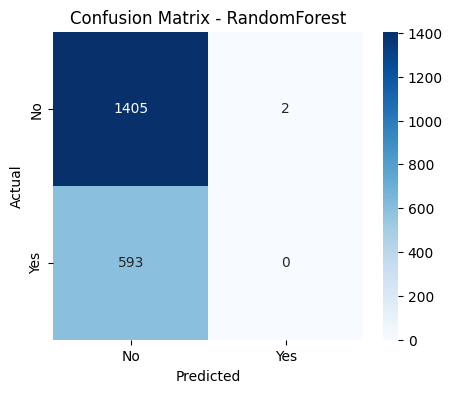


SVM Classification Report:

              precision    recall  f1-score   support

          No       0.70      1.00      0.83      1407
         Yes       0.00      0.00      0.00       593

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



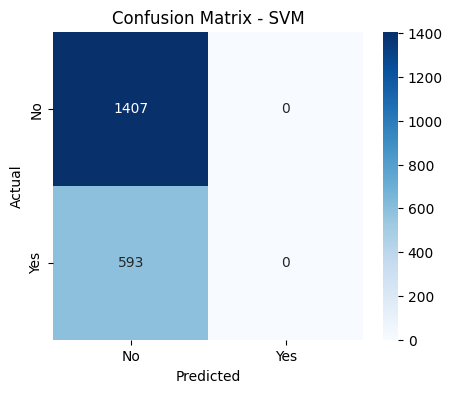


LogisticRegression Classification Report:

              precision    recall  f1-score   support

          No       0.70      1.00      0.83      1407
         Yes       0.00      0.00      0.00       593

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



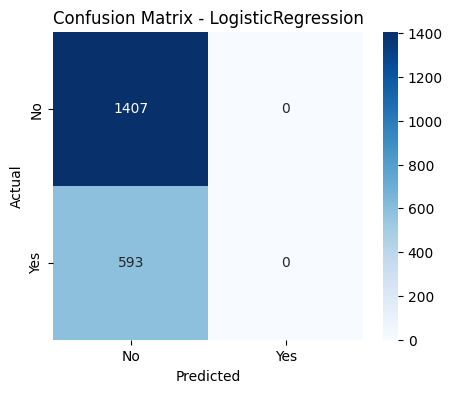

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
    plot_confusion_matrix(y_test, y_pred, name)

              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1407
           1       0.00      0.00      0.00       593

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



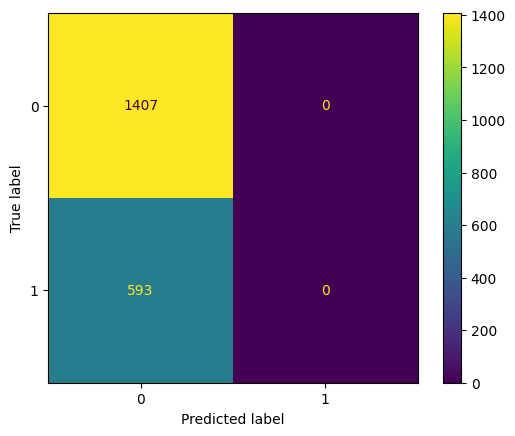

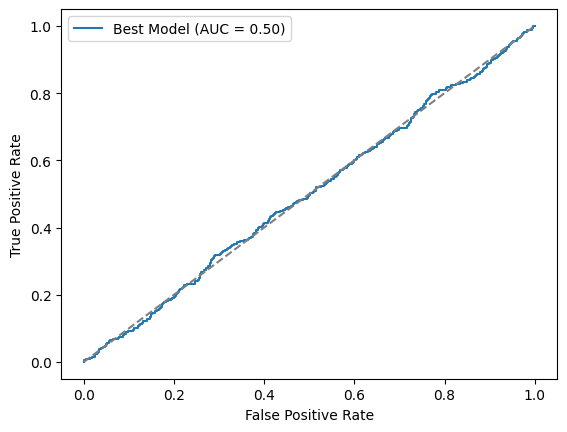

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best)).plot()
plt.show()

# ROC Curve
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label="Best Model (AUC = {:.2f})".format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


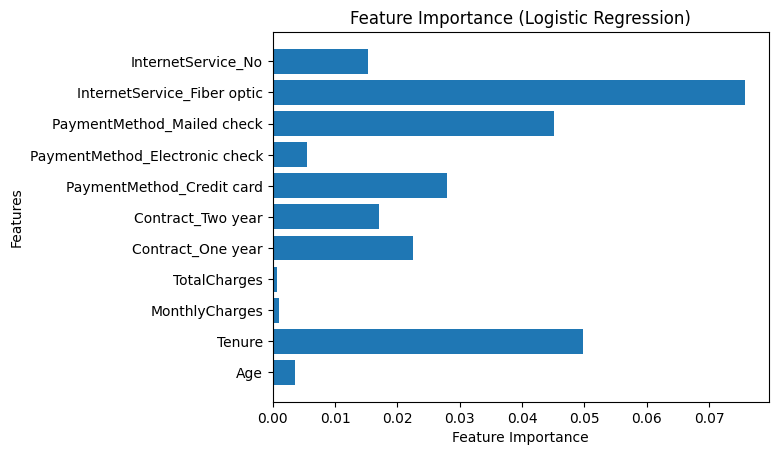

In [42]:
import numpy as np

importances = np.abs(best_model.coef_[0])  # Take absolute values of coefficients
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [43]:
import pickle

# Save the trained model
with open("churn_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the feature names used during training
with open("feature_names.pkl", "wb") as feature_file:
    pickle.dump(list(X_train.columns), feature_file)


In [79]:
import numpy as np

input_data = np.array([[28, 2, 150.0, 300.0, 0, 0, 0, 1, 0, 1, 0]])
prediction = model.predict(input_data)
prediction

array([0])